In [103]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from Readfile import Read


# with code from R. Hoffman and E Patel


# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline



In [76]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


# Homework 4
# Center of Mass Position and Velocity
# Emily Walla


# In[2]:


# import modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
from Readfile import Read


# In[3]:


class CenterOfMass:
# Class to define COM position and velocity properties of a given galaxy 
# and simulation snapshot
    
    
    def __init__(self, filename, ptype):
    # Initialize the instance of this Class with the following properties:
    
        # read data in the given file using Read
        self.time, self.total, self.data = Read(filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m'][self.index]
        # write your own code to complete this for positions and velocities
        self.m = self.data["m"][self.index]
        self.x = self.data["x"][self.index]
        self.y = self.data["y"][self.index]
        self.z = self.data["z"][self.index]
        self.vx = self.data["vx"][self.index]
        self.vy = self.data["vy"][self.index]
        self.vz = self.data["vz"][self.index]


    def COMdefine(self,a,b,c,m):
    # Function to compute the center of mass position or velocity generically
    # input: array (a,b,c) of positions or velocities and the mass
    # returns: 3 floats  (the center of mass coordinates)
    
    #Eq 1: COM: X_com = sum(position*m_i)/sum(m_i)

        # write your own code to compute the generic COM using Eq. 1 in the homework instructions
        # xcomponent Center of mass
        Xcom = np.sum(a*m)/np.sum(m)
        # ycomponent Center of mass
        Ycom = np.sum(b*m)/np.sum(m)
        # zcomponent Center of mass
        Zcom = np.sum(c*m)/np.sum(m)
        
        return Xcom, Ycom, Zcom
    
    
    def COM_P(self, delta, VolDec):
    # Function to specifically return the center of mass position and velocity                                         
    # input:                                                                                                           
    #        particle type (1,2,3)                                                                                     
    #        delta (tolerance)
    #        VolDec: amount by which RMAX is decreased
    # returns: One vector, with rows indicating:                                                                                                                                                                            
    #       3D coordinates of the center of mass position (kpc)                                                             

        # Center of Mass Position                                                                                      
        ###########################                                                                                    

        # Try a first guess at the COM position by calling COMdefine                                                   
        XCOM, YCOM, ZCOM = self.COMdefine(self.x, self.y, self.z, self.m)
        # compute the magnitude of the COM position vector.
        # write your own code below
        RCOM = np.sqrt((XCOM**2)+(YCOM**2)+(ZCOM**2))


        # iterative process to determine the center of mass                                                            

        # change reference frame to COM frame                                                                          
        # compute the difference between particle coordinates                                                          
        # and the first guess at COM position
        # write your own code below
        xNew = self.x - XCOM
        yNew = self.y - YCOM
        zNew = self.z - ZCOM
        RNEW = np.sqrt((xNew**2)+(yNew**2)+(zNew**2))

        # find the max 3D distance of all particles from the guessed COM                                               
        # will re-start at half that radius (reduced radius)                                                           
        RMAX = max(RNEW)/VolDec
        
        # pick an initial value for the change in COM position                                                      
        # between the first guess above and the new one computed from half that volume
        # it should be larger than the input tolerance (delta) initially
        CHANGE = 1000.0

        # start iterative process to determine center of mass position                                                 
        # delta is the tolerance for the difference in the old COM and the new one.    
        
        while (CHANGE > delta):
            # select all particles within the reduced radius (starting from original x,y,z, m)
            # write your own code below (hints, use np.where)
            index2 = np.where(RNEW<=RCOM)
            x2 = self.x[index2]
            y2 = self.y[index2]
            z2 = self.z[index2]
            m2 = self.m[index2]

            # Refined COM position:                                                                                    
            # compute the center of mass position using                                                                
            # the particles in the reduced radius
            # write your own code below
            XCOM2, YCOM2, ZCOM2 = self.COMdefine(x2, y2, z2, m2)
            # compute the new 3D COM position
            # write your own code below
            RCOM2 = np.sqrt((XCOM2**2)+(YCOM2**2)+(ZCOM2**2))
            # determine the difference between the previous center of mass position                                    
            # and the new one.                                                                                         
            CHANGE = np.abs(RCOM - RCOM2)
            # uncomment the following line if you wnat to check this                                                                                               
            #print ("CHANGE = ", CHANGE)                                                                                     

            # Before loop continues, reset : RMAX, particle separations and COM                                        

            # reduce the volume by a factor of 2 again                                                                 
            RMAX = RMAX/VolDec
            # check this.                                                                                              
            #print ("maxR", RMAX)                                                                                      

            # Change the frame of reference to the newly computed COM.                                                 
            # subtract the new COM
            # write your own code below
            xNew = self.x-XCOM2
            yNew = self.y-YCOM2
            zNew = self.z-ZCOM2
            RNEW = np.sqrt((xNew**2)+(yNew**2)+(zNew**2))

            # set the center of mass positions to the refined values                                                   
            XCOM = np.around((XCOM2),2)
            YCOM = np.around((YCOM2),2)
            ZCOM = np.around((ZCOM2),2)
            RCOM = RCOM2

            # create a vector to store the COM position                                                                                                                                                       
            COMP = np.array([XCOM, YCOM, ZCOM])

        # set the correct units usint astropy and round all values
        # and then return the COM positon vector
        # write your own code below
            return COMP
    

    def COM_V(self, COMX,COMY,COMZ):
        # Center of Mass velocity
        # input: X, Y, Z positions of the COM
        # returns 3D Vector of COM Velocities
        
        # the max distance from the center that we will use to determine the center of mass velocity                   
        RVMAX = 15.0*u.kpc

        # determine the position of all particles relative to the center of mass position
        # write your own code below
        xV = self.x - COMX
        yV = self.y - COMY
        zV = self.z - COMZ
        RV = np.sqrt((xV**2)+(yV**2)+(zV**2))
       
        
        # determine the index for those particles within the max radius
        # write your own code below
        indexV = np.where(RV<=RVMAX.value)

        # determine the velocity and mass of those particles within the mas radius
        # write your own code below
        vxnew = self.vx[indexV]
        vynew = self.vy[indexV]
        vznew = self.vz[indexV]
        mnew =  self.m[indexV]
      
        # compute the center of mass velocity using those particles
        # write your own code below
        VXCOM, VYCOM, VZCOM = self.COMdefine(vxnew,vynew,vznew,mnew)

        # create a vector to store the COM velocity
        # set the correct units usint astropy
        # round all values
        # write your own code below
        COMV = [VXCOM, VYCOM, VZCOM]

        # return the COM vector                                                                                        
        return COMV



In [9]:
time, total, data = Read("/home/astr400b/VLowRes/M33_000.txt")

def v_disp(galaxy, start, end, n):
    # calculates the velocity dispersion of a galaxy
    # inputs:
    #     galaxy: the galaxy name, as a string
    #     start: the start snapnumber
    #     end: the end snapnumber
    #     n: the number of snaps
    
    # returns:
    #     the velocity dispersion of the galaxy
    
     # generate the snapshot id sequence 
    snap_ids = np.arange(start,end,n)
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        if snap_ids[i] < 9.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_00" + str(snap_ids[i]) + ".txt"
        elif snap_ids[i] < 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_0" + str(snap_ids[i]) + ".txt"
        elif snap_ids[i] > 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_" + str(snap_ids[i]) + ".txt"
        else:
            print("Invalid snap numbers input")
    
        
        
    
    
            

In [163]:
class V_disp:
    
    def __init__(self, galaxy, snap_id, ptype=2):
        
            
        if snap_id < 9.9:
               self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_00" + str(snap_id) + ".txt"
        elif snap_id < 99.9:
               self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_0" + str(snap_id) + ".txt"
        elif snap_id > 99.9:
              self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_" + str(snap_id) + ".txt"
        # read data in the given file using Read
        self.time, self.total, self.data = Read(self.filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m'][self.index]
        # write your own code to complete this for positions and velocities
        self.m = self.data["m"][self.index]
        self.x = self.data["x"][self.index]
        self.y = self.data["y"][self.index]
        self.z = self.data["z"][self.index]
        self.vx = self.data["vx"][self.index]
        self.vy = self.data["vy"][self.index]
        self.vz = self.data["vz"][self.index]
        
    def velocity(self):
        # Create a COM of object for M31 Disk Using Code from Assignment 4
        COMD = CenterOfMass(self.filename,2)
# Compute COM of M31 using disk particles
        COMP = COMD.COM_P(0.1,4)
        COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])


# Determine positions of disk particles relative to COM 
        xD = COMD.x - COMP[0] 
        yD = COMD.y - COMP[1]
        zD = COMD.z - COMP[2] 

# total magnitude
        rtot = np.sqrt(xD**2 + yD**2 + zD**2)

# Determine velocities of disk particles relatiev to COM motion
        vxD = COMD.vx - COMV[0]
        vyD = COMD.vy - COMV[1]
        vzD = COMD.vz - COMV[2] 

# total velocity 
        vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)
        
        return vtot
    

                    
def v_disp(v):
        
    avg_v = np.sum(v)/(len(v))
    v_disp = np.zeros_like(v)
        

    for i in range(len(v)):
        v_disp[i] = (v[i]-avg_v)**2
            
    return np.sqrt(np.sum(v_disp)/len(v))
    

In [170]:
M33_v = np.zeros((160,9300))
M33_vr = np.zeros_like(M33_v)

snap_ids = np.arange(0,800,5)
print(snap_ids)

M33_disp = np.zeros(160)



for i in range(len(snap_ids)):
    n = snap_ids[i]
    M33_v[i,:] = V_disp("M33",n).velocity()
    #M33_vr[i,:] = V_disp("M33",n).velocity_r()
    M33_disp[i] = v_disp(M33_v[i,:])
   # M33_prof = MassProfile("M33",i)
    



[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535
 540 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625
 630 635 640 645 650 655 660 665 670 675 680 685 690 695 700 705 710 715
 720 725 730 735 740 745 750 755 760 765 770 775 780 785 790 795]


In [93]:
# Create a COM of object for M31 Disk Using Code from Assignment 4
COMD = CenterOfMass("/home/astr400b/VLowRes/M33_000.txt",2)
# Compute COM of M31 using disk particles
COMP = COMD.COM_P(0.1,4)
COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])


# Determine positions of disk particles relative to COM 
xD = COMD.x - COMP[0] 
yD = COMD.y - COMP[1]
zD = COMD.z - COMP[2] 

# total magnitude
rtot = np.sqrt(xD**2 + yD**2 + zD**2)

# Determine velocities of disk particles relatiev to COM motion
vxD = COMD.vx - COMV[0]
vyD = COMD.vy - COMV[1]
vzD = COMD.vz - COMV[2] 

# total velocity 
vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

# Vectors for r and v 
r = np.array([xD,yD,zD]).T # transposed 
v = np.array([vxD,vyD,vzD]).T




In [141]:
# a function that will rotate the position and velocity vectors
# so that the disk angular momentum is aligned with z axis. 

def RotateFrame(posI,velI):
    # input:  3D array of positions and velocities
    # returns: 3D array of rotated positions and velocities such that j is in z direction

    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    # normalize the vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


# determine the rotated velocity vectors
rn, vn = RotateFrame(r,v)

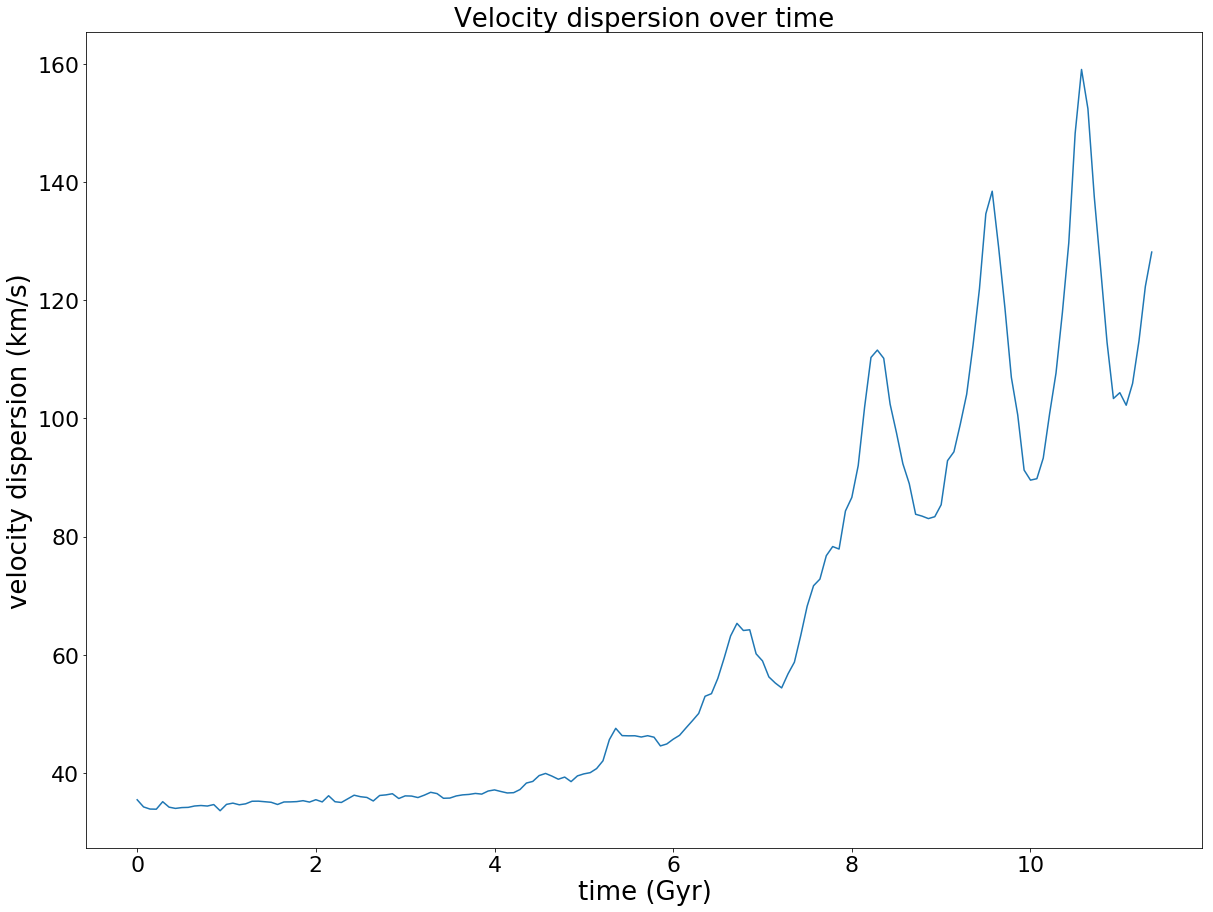

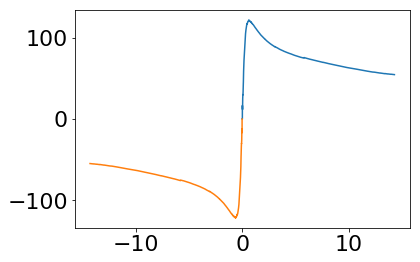

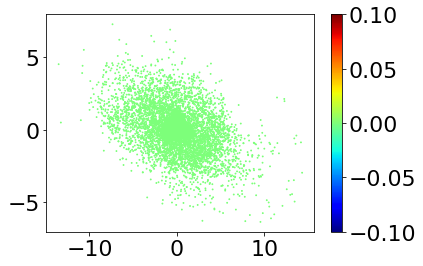

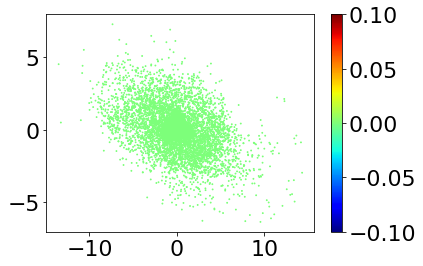

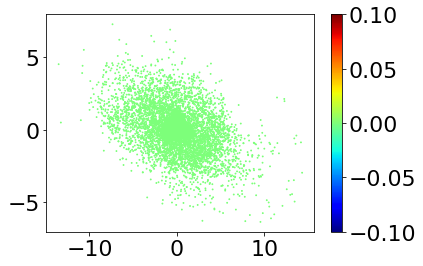

In [181]:
M33t, M33x, M33y, M33z, M33vx, M33vy, M33vz = np.genfromtxt("Orbit_M33.txt",delimiter=" ", unpack = True)

plt.figure(figsize=(20,15))
plt.title("Velocity dispersion over time",fontsize=26)
plt.ylabel("velocity dispersion (km/s)",fontsize=26)
plt.xlabel("time (Gyr)",fontsize=26)
plt.plot(M33t/10e2,M33_disp)
plt.show()



#plt.hist2d(rn[:,0], vn[:,1], bins=150, norm=LogNorm(),cmap="jet")
#plt.colorbar()
plt.plot(R,Vcirc)
plt.plot(-R,-Vcirc)
plt.show()


plt.scatter(xD,yD,c=M33_vr[10,:],cmap="jet",s=.75)
plt.colorbar()
plt.show()


plt.scatter(xD,yD,c=M33_vr[20,:],cmap="jet",s=.75)
plt.colorbar()
plt.show()



plt.scatter(xD,yD,c=M33_vr[30,:],cmap="jet",s=.75)
plt.colorbar()
plt.show()

In [45]:
print(v)
print(v_dispersion)

[275.17374174 242.51399432 277.65878526 ... 366.87580089 326.61427545
 406.22911179]
70.50603509675106


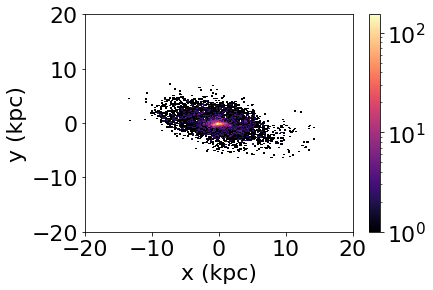

In [108]:

# plot the particle density for M31 using a 2D historgram
# can modify bin number to make the plot smoother
plt.hist2d(xD, yD, bins=150, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-20,20)
plt.xlim(-20,20)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
#density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

In [121]:

from astropy.constants import G
# convert G to correct units
G = G.to(u.kpc*u.km**2/u.s**2/u.Msun)

# create class MassProfile
class MassProfile:
    # Class to define the mass profile of a galaxy at a snapshot time
    
    def __init__(self, galaxy, snap_id):
        
        # inputs:
        #       galaxy: a string with galaxy name, such as "MW" or "M31"
        #       snap:  the snapshot number, such as 0, 1, etc
        
        # Initialize instance of this class with the following properties:
        
        # store the name of the galaxy
        self.gname = galaxy
        
        if snap_id < 9.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_00" + str(snap_id) + ".txt"
        elif snap_id < 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_0" + str(snap_id) + ".txt"
        elif snap_id > 99.9:
            filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_" + str(snap_id) + ".txt"
        
       
        self.filename =  filename
        # read in the data of our desired file
        self.time, self.total, self.data = Read(self.filename) 
    
        # read in the data for the x, y, z positions and the mass
        self.m = self.data["m"]
        self.x = self.data["x"]*u.kpc
        self.y = self.data["y"]*u.kpc
        self.z = self.data["z"]*u.kpc
        
    def MassEnclosed(self, component, r):
        # function that computes the mass enclosed
        #      within a given radius of the COM position
        #      for a specified galaxy & a specified component of galaxy
        
        
        # inputs:
        #      component: the component you want the mass of
        #           either 1 (Halo), 2 (Disk) or 3 (Bulge)
        #      r: the radii (kpc) in which you want to calculate the mass
        #           input r as an array
        
        # returns:
        #      an array of the mass enclosed (Msun) within a given radius
        
        
        # Determine COM Position
        CoM = CenterOfMass(self.filename,component).COM_P(0.1,4)
        # distance to the center of mass
        COM_D = np.sqrt(CoM[0]**2 + CoM[1]**2 + CoM[2]**2)
        
        # create an index to extract only the component we are using
        index = np.where(self.data["type"]==component)
        
        # get mass, x, y z  of only the desired component
        part_mass = self.m[index]
        part_x = self.x[index].value - CoM[0]
        part_y = self.y[index].value - CoM[1]
        part_z = self.z[index].value - CoM[2]
        
        # calculate radii for our component
        part_r = np.sqrt( (part_x**2)+(part_y**2)+(part_z**2) )
        
        # find Mass Enclosed within that radius of the COM
        Mass = np.zeros_like(r)
        
        r_index = np.zeros_like(r)
        
        
        i = 0
        for i in range(len(r)):
            # create index to get all points within given radius
            #r_index[i] = np.where(part_r <= r[i])
            Mass[i] = np.sum( part_mass[np.where( part_r < r[i])] )
            
        return Mass*1e10*u.Msun
    
    
    
    def MassEnclosedTotal(self, r):
        # function calculates the total mass enclosed within the given radii
        
        # inputs:
        #      r: a 1D array of radii (kpc)
        
        # returns:
        #      a 1D array of the total masses enclosed within the radii
        
        
        # make a caveat for M33, galaxy with no bulge
        if self.gname == "M33":
            iterate = 2 # M33 only has 2 components
        else:
            iterate = 3 # The other galaxies have 3 components
        
        # make an array to store the masses in
        part_mass = np.zeros((iterate,len(r)))
        
        # get the masses of each component
        i = 0
        for i in range(iterate):
            part_mass[i,:] = self.MassEnclosed(i+1,r)
      
        return np.sum(part_mass,axis=0)
            
    def HernquistMass(self, r, a, Mhalo):
        # function computes the mass enclosed within a given radius
        #     given the theoretical Hernquist profile
        
        
        # inputs:
        #     r: 1D array of radii (kpc) from Center of mass position
        #     a: scale factor
        #     Mhalo: the halo mass of the galaxy (Msun)
        
        # returns:
        #      Returns halo mass (Msun)
        
        return (Mhalo*(r**2))/((a+r)**2)
            
        
    def CircularVelocity(self, component, r):
        # function that computes the circular velocity of the enclosed mass
        # assumes spherical symmetry
        # Vc = (GM/R)^1/2
        
        # inputs:
        #     component: the type of particle you're working with
        #           1 (halo), 2 (disk), 3 (bulge)
        #     r: 1D array of radii (kpc)
        
        # returns:
        #     1D array of circular speeds in units of km/s
        
        M = self.MassEnclosed(component, r)
        
        return np.sqrt(G*M/r)

    def CircularVelocityTotal(self, r):
        # function that calculates the circular velocity of the total enclosed mass
        
        # inputs: r: 1D array of radii (kpc)
        
        # returns: circular velocity of total enclosed mass (km/s)
        
        M = self.MassEnclosedTotal(r)
        
        return np.sqrt(G*M/r)
    
    def HernquistVCirc(self,r, a, Mhalo):
        # computes the circular speed of the Hernquist mass
        
        # inputs:
        #     r: 1D array of radii (kpc) from Center of mass position
        #     a: scale factor
        #     Mhalo: the halo mass of the galaxy (Msun)
        
        # returns: the circular speed of the Hernquist Mass (km/s)
    
        M = self.HernquistMass(r,a,Mhalo)
        return np.round((np.sqrt(G*M/r)),2)

In [152]:

M33_prof = MassProfile("M33",0)

In [153]:
R = np.linspace(0.00001,np.max(xD),4650)
Vcirc = M33_prof.CircularVelocityTotal(R)

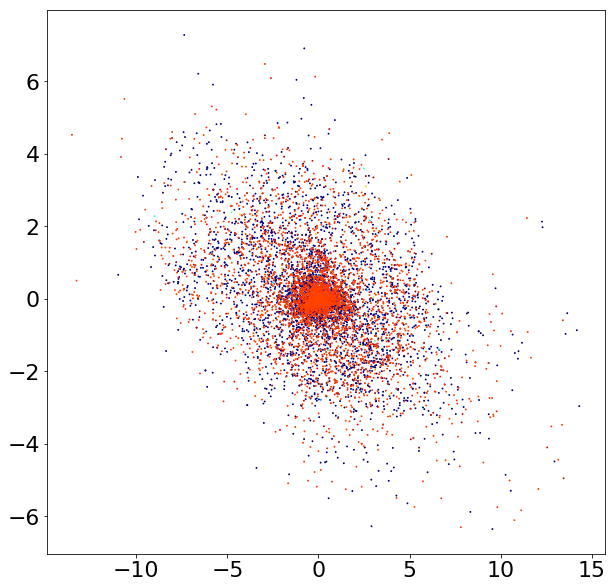

In [131]:
# MW Disk Velocity Field edge on.

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# looking at MW edge on along x axis, vy is line of sight velocity

plt.scatter(xD,yD,c=Vcirc,s=.75,cmap="jet")